# Example - using hetdex_api::sqlite_utils to access ELiXer reports

## For browsing/reviewing many ELiXer Reports, it is recommended you use one of the ELiXer widget notebooks, which wraps detection access with easy to use navigation buttons, etc


# Prior to using this notebook, you must install hetdex_api
See https://github.com/HETDEX/hetdex_api.git

Note: you will also need the common Python packages io, PIL, and matplotlib (which should all normally be part of your existing Python installation)

To install, cd into the top hetdex_api directory and issue this command:
pip install --user --upgrade -e .

The "--upgrade" will handle overwriting of any downlevel version of hetdex_api you may have previously installed.
The "-e" switch will auto-update any time you perform a "git pull" on the hetdex_api directory (so you do not need to pip install again after an update).


In [1]:
from hetdex_api import sqlite_utils as sql
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#It is recommended you create and access the databases through the Connection Manager (ConnMgr) which will handle 
#all your database connections, search paths, etc
conn_mgr = sql.ConnMgr()

In [3]:
#to get a report, simply request with the detectid and the report type and the ConnMgr will handle the fetch
#  the valid report types are "report","nei","mini"  (with the default being "report")
#The returned image is a .png file blob
#While there are multiple interfaces, most are for internal use and the "fetch_image" is the only interface
#  you shoudl use
png_rpt = conn_mgr.fetch_image(2000724259,report_type="report")
len(png_rpt)

511942

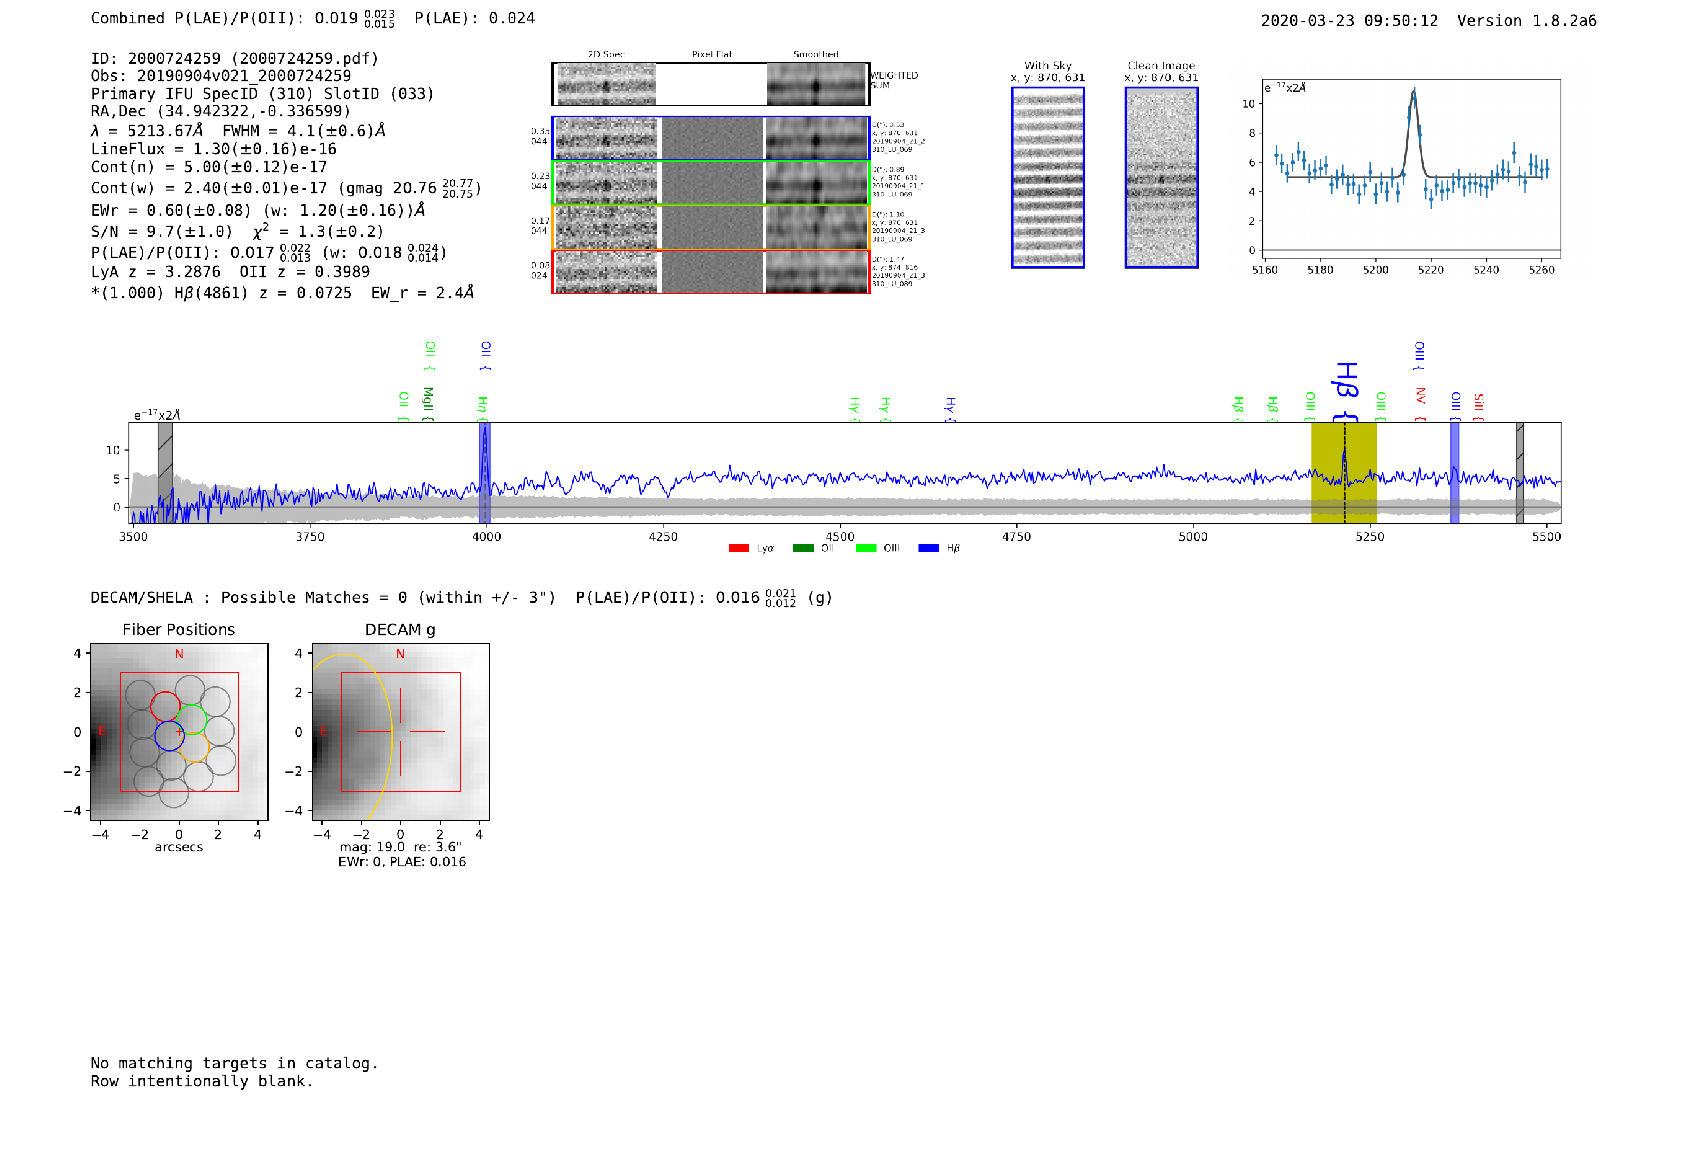

In [4]:
#You can then display the report image 
#In this example, we are just using matplotlib to display a PIL image (fed the png file as a BytesIO object)
#but you can use any mechanism you like
plt.figure(figsize=(30,30))
plt.axis('off')
plt.imshow(Image.open(BytesIO(png_rpt)))

In [5]:
#To get the neighborhood, just change the report_type
png_nei = conn_mgr.fetch_image(2000724259,report_type="nei")

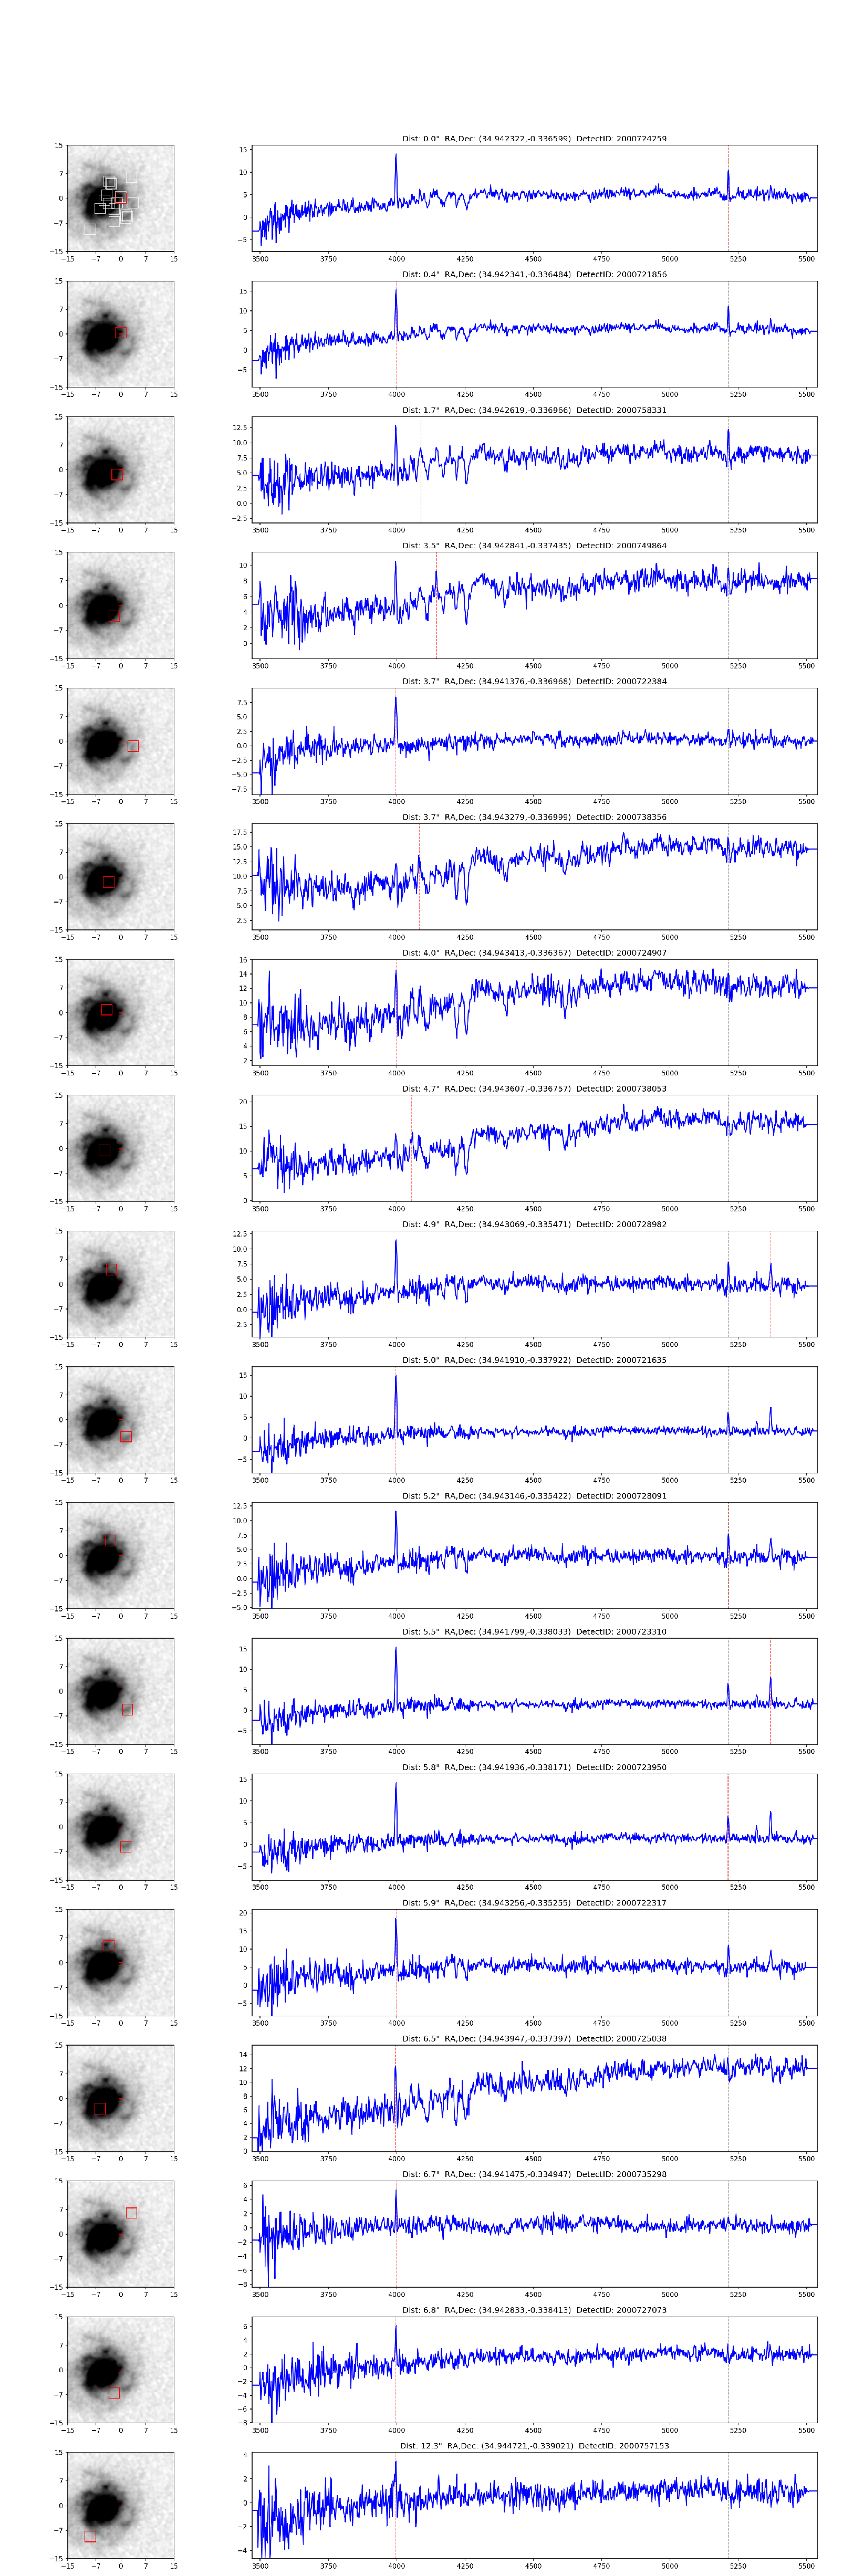

In [6]:
plt.figure(figsize=(30,90))
plt.axis('off')
plt.imshow(Image.open(BytesIO(png_nei)))